In [124]:
"""
An opposed-flow ethane/air diffusion flame

Requires: cantera >= 3.0, matplotlib >= 2.0
Keywords: combustion, 1D flow, diffusion flame, strained flame, plotting,
          saving output
"""

from pathlib import Path
import cantera as ct
import matplotlib.pyplot as plt
%matplotlib inline
import math as math
import numpy as np


In [125]:
# Input parameters
p = ct.one_atm  # pressure
tin_f = 300.0  # fuel inlet temperature
tin_o = 300.0  # oxidizer inlet temperature
rho_fuel = 4.6403 # iso -octane density
#rho_fuel = 0.657 #methane density
rho_air = 1.19 # density of air at STP

vel_air = 1.5 # velocity of air
vel_fuel = math.sqrt((vel_air*vel_air*rho_air)/rho_fuel)
print(vel_fuel)
mdot_o =  rho_air*vel_air
mdot_f =  rho_fuel*vel_fuel
print(mdot_o)
print(mdot_f)
print()

0.7596118134317975
1.785
3.52482669786757



In [126]:
YO2_values = []
YC8H18_values = []
mixture_fraction = []

comp_o = 'O2:0.21, N2:0.79'  # air composition
comp_f = 'IXC8H18:1'  # fuel composition

#comp_f = 'CH4:1'  # fuel composition

width = 0.02  # Distance between inlets is 2 cm

loglevel = 1  # amount of diagnostic output (0 to 5)

# Create the gas object used to evaluate all thermodynamic, kinetic, and
# transport properties.
gas = ct.Solution('Jerzembeck.yaml')
#gas = ct.Solution('gri30.yaml')
gas.TP = gas.T, p

# Create an object representing the counterflow flame configuration,
# which consists of a fuel inlet on the left, the flow in the middle,
# and the oxidizer inlet on the right.
f = ct.CounterflowDiffusionFlame(gas, width=width)

# Set the state of the two inlets
f.fuel_inlet.mdot = mdot_f
f.fuel_inlet.X = comp_f
f.fuel_inlet.T = tin_f

f.oxidizer_inlet.mdot = mdot_o
f.oxidizer_inlet.X = comp_o
f.oxidizer_inlet.T = tin_o

# Set the boundary emissivities
f.boundary_emissivities = 0.0, 0.0
# Turn radiation off
f.radiation_enabled = False

f.set_refine_criteria(ratio=4, slope=0.2, curve=0.3, prune=0.04)

# Solve the problem
f.solve(loglevel, auto=True)
f.show()
'''
if "native" in ct.hdf_support():
    output = Path() / "diffusion_flame.h5"
else:
    output = Path() / "diffusion_flame.yaml"
output.unlink(missing_ok=True)
f.save(output)
'''
Z_points = []
Z_points.append(f.mixture_fraction('Bilger'))
YO2_values.append(f.Y[gas.species_index('O2')])
YC8H18_values.append(f.Y[gas.species_index('IXC8H18')])
#YC8H18_values.append(f.Y[gas.species_index('CH4')])
# write the velocity, temperature, and mole fractions to a CSV file
#f.save('diffusion_flame.csv', basis="mole", overwrite=True)

f.show_stats(0)


************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     4.449e-07      6.442
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      1.14e-05       6.27
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001948      5.423
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0004932      5.071
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.000395      4.752
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0008436      4.503
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.009609      3.326
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.136e-05       5.53
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003649      4.856
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.924e-05      4.486
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     9.742e-05      4.352
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002774      3.945
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.00474      3.129
Attempt Newton solution of steady-state problem...    success.

Problem solved on [36] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 9 10 11 12 13 14 15 16 17 18 19

In [127]:

flame_velocity = f.velocity
f.strain_rate('max')
max_heat_release_idx = np.argmax(f.heat_release_rate)
print(max_heat_release_idx)
print(f.T)
print(f.equivalence_ratio[74])
print(f.flame.grid[74])
f.strain_rate('stoichiometric', fuel='IXC8H18', oxidizer='O2',stoich = f.equivalence_ratio[110])

82
[ 300.          300.          300.          300.          300.
  300.          300.00000003  300.00000072  300.00001917  300.00043323
  300.00328825  300.02719102  300.19894054  301.22305951  303.19367689
  308.27494037  313.27637942  321.07067069  332.5405435   348.40835541
  369.01190563  381.13387393  394.44260502  408.85311478  424.26916644
  440.5913833   457.72312905  475.57406311  494.06176022  513.11196561
  532.65803376  552.639979    573.00342655  593.69863243  614.67965479
  635.90370989  646.59159947  657.32654161  668.10391756  678.91910371
  700.65091442  722.47940092  744.37283036  766.30098405  788.2351362
  832.05181872  875.57295359  918.62929418  961.09684479 1002.84711998
 1043.77757439 1083.81848916 1122.95331765 1161.25354473 1198.91630249
 1236.28048492 1273.79570165 1311.93251046 1331.36964668 1351.07023667
 1371.03232605 1391.22924683 1411.60968703 1432.10100772 1473.1508259
 1513.79992904 1553.7746811  1593.01873572 1631.55035717 1669.32133655
 1706.1079681

870.7350076315618

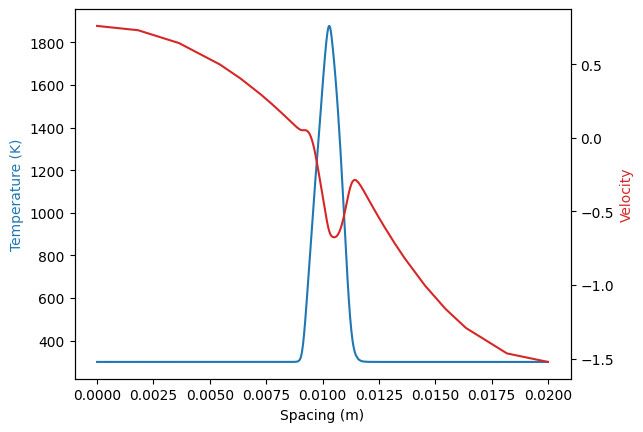

In [89]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Spacing (m)')
ax1.set_ylabel('Temperature (K)', color='tab:blue')
ax1.plot(f.flame.grid, f.T, label='Temperature without radiation')

ax2 = ax1.twinx() 
ax2.set_ylabel('Velocity', color='tab:red')
ax2.plot(f.flame.grid, flame_velocity, label='Temperature without radiation',color='tab:red')

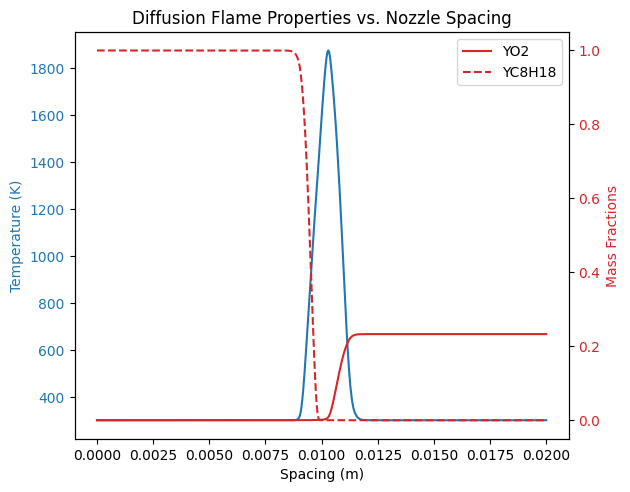

In [91]:
# Create a plot with dual Y-axes
fig, ax1 = plt.subplots()

ax1.set_xlabel('Spacing (m)')
ax1.set_ylabel('Temperature (K)', color='tab:blue')
ax1.plot(f.flame.grid, f.T, label='Temperature without radiation')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Mass Fractions', color='tab:red')
ax2.plot(f.flame.grid, YO2_values[0], label='YO2', color='tab:red')
ax2.plot(f.flame.grid, YC8H18_values[0], label='YC8H18', linestyle='dashed', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.legend(loc='upper right')
plt.title('Diffusion Flame Properties vs. Nozzle Spacing')
plt.show()

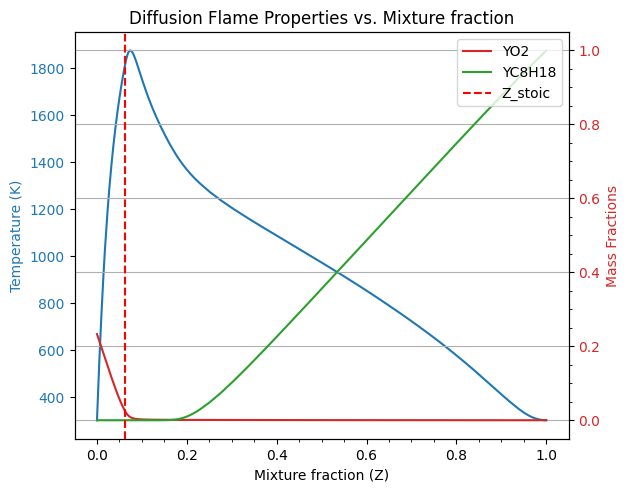

In [116]:
Z_stoic = 0.0621
fig, ax1 = plt.subplots()

ax1.set_xlabel('Mixture fraction (Z)')
ax1.set_ylabel('Temperature (K)', color='tab:blue')
ax1.plot(Z_points[0], f.T, label='Temperature (K)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Mass Fractions', color='tab:red')
ax2.plot(Z_points[0], YO2_values[0], label='YO2', color='tab:red')
ax2.plot(Z_points[0], YC8H18_values[0], label='YC8H18', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.axvline(x=Z_stoic, color='red', linestyle='--', label='Z_stoic')
fig.tight_layout()
plt.legend(loc='upper right')
# Enable the minor grid
plt.minorticks_on()
plt.grid(True)
plt.title('Diffusion Flame Properties vs. Mixture fraction')
plt.show()

Past 5 - Equllibrium temperature calculation

In [118]:
# Constants
R = 8314.4621  # J/kmol/K (universal gas constant)
Cp = 3.5 * R   # Constant heat capacity (J/kmol/K)

#Create a gas object using the Jerzembeck mechanism
gas = ct.Solution('Jerzembeck.yaml')

phi = 1
gas.TP = 300.0, ct.one_atm
gas.set_equivalence_ratio(phi, 'IXC8H18', 'O2:12.5, N2:47')
gas.equilibrate('HP')
T_adiabatic = gas.T
print(f'Equivalence Ratio: {phi:.2f}, Adiabatic Flame Temperature: {T_adiabatic:.2f} K')

Equivalence Ratio: 1.00, Adiabatic Flame Temperature: 2273.56 K


Part - 6 For the different air velocity

In [119]:
# Input parameters
p = ct.one_atm  # pressure
tin_f = 300.0  # fuel inlet temperature
tin_o = 300.0  # oxidizer inlet temperature
#rho_fuel = 0.657 #methane density
rho_fuel = 4.6403 #iso octane density
rho_air = 1.19 # density of air at STP
vel_air = [0.1,2.0,3.3]

flame_temp = []
YO2_values = []
YC8H18_values = []
mixture_fraction_points = []

width = 0.02  # Distance between inlets is 2 cm

In [120]:
for i in range(len(vel_air)):
    Z_points = []
    O2_values = []
    C8H18_values = []
    temp = []
    vel_fuel = math.sqrt((vel_air[i]*vel_air[i]*rho_air)/rho_fuel)
    mdot_o =  rho_air*vel_air[i]
    mdot_f =  rho_fuel*vel_fuel

    comp_o = 'O2:0.21, N2:0.79'  # air composition
    comp_f = 'IXC8H18:1'  # fuel composition
    #comp_f = 'CH4:1'  # fuel composition

    loglevel = 1  # amount of diagnostic output (0 to 5)

    # Create the gas object used to evaluate all thermodynamic, kinetic, and
    # transport properties.
    gas = ct.Solution('Jerzembeck.yaml')
    #gas = ct.Solution('gri30.yaml')
    gas.TP = gas.T, p

    # Create an object representing the counterflow flame configuration,
    # which consists of a fuel inlet on the left, the flow in the middle,
    # and the oxidizer inlet on the right.
    f = ct.CounterflowDiffusionFlame(gas, width=width)

    # Set the state of the two inlets
    f.fuel_inlet.mdot = mdot_f
    f.fuel_inlet.X = comp_f
    f.fuel_inlet.T = tin_f

    f.oxidizer_inlet.mdot = mdot_o
    f.oxidizer_inlet.X = comp_o
    f.oxidizer_inlet.T = tin_o

    # Set the boundary emissivities
    f.boundary_emissivities = 0.0, 0.0
    # Turn radiation off
    f.radiation_enabled = False

    f.set_refine_criteria(ratio=4, slope=0.2, curve=0.3, prune=0.04)

    # Solve the problem
    f.solve(loglevel, auto=True)
    f.show()
    '''
    if "native" in ct.hdf_support():
        output = Path() / "diffusion_flame.h5"
    else:
        output = Path() / "diffusion_flame.yaml"
    output.unlink(missing_ok=True)
    f.save(output)
    '''

    Z_points.append(f.mixture_fraction('Bilger'))
    O2_values.append(f.Y[gas.species_index('O2')])
    temp.append(f.T)
    C8H18_values.append(f.Y[gas.species_index('IXC8H18')])
    #C8H18_values.append(f.Y[gas.species_index('CH4')])
    # write the velocity, temperature, and mole fractions to a CSV file
    #f.save('diffusion_flame.csv', basis="mole", overwrite=True)

    f.show_stats(0)
    YO2_values.append(O2_values[0])
    mixture_fraction_points.append(Z_points[0])
    YC8H18_values.append(C8H18_values[0])
    flame_temp.append(temp[0])


************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     6.674e-07      7.217
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.711e-05      6.015
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0004384       4.69
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.003329      4.524
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.00749       3.73
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.02844      3.015
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement d

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     7.594e-05      4.071
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001297      3.638
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001386      3.458
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.005261      2.839
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.01124      2.337
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.04799      1.515
Attempt Newton solution of steady-state problem...    success.

Problem solved on [56] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 12 13 14 15 16 17 18 19 20 21 2


************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     4.449e-07      6.264
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      1.14e-05      6.178
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     6.495e-05      6.064
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002192      5.739
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001849      5.315
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001404      4.425
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement d

Attempt Newton solution of steady-state problem...    success.

Problem solved on [38] point grid(s).

..............................................................................
no new points needed in flame

********************* Flame is extinct on 12 point grid **********************

*********** Solving on 24 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     6.674e-07      7.278
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      1.14e-05      6.732
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      4.33e-05      6.203
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     9.133e-06      6.029
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.926e-05      5.974
Attempt Newto

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     8.438e-06      5.903
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.848e-05      5.181
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.403e-05      4.985
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001368      4.962
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001539      4.351
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     7.697e-05      4.111
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001155       3.89
Attempt Newton solution of steady-state problem...    success.

Problem solved on [58] point grid(s).

..............................................................................
#####################################################################

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         1e-05      3.889
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         1e-05      3.857
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         1e-05      3.826
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         1e-05      3.794
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       1.5e-05      3.749
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       1.5e-05      3.703
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     4.805e-05       3.63
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     5.132e-05      3.564
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      5.48e-05      3.534
Attempt Newton solution of steady-sta


************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     6.674e-07      6.956
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.711e-05      5.891
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      4.33e-05      5.952
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002192      5.696
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0005548      4.634
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

******** Initial solve failed; Retrying with energy equation disabled ********

.................

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.531e-05      6.783
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     5.695e-05      6.057
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     6.407e-05      6.205
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     9.611e-05      5.784
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002162      5.209
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003244      5.163
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001825      5.487
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0009237      4.621
Attempt Newton solution of steady-state problem...    success.

Problem solved on [24] point grid(s).

.........................................

Take 10 timesteps     2.312e-05      5.055
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.312e-05      5.076
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.312e-05      5.125
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     5.202e-05      5.219
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     5.852e-05      5.512
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     7.406e-05      5.786
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.562e-05      6.056
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.343e-05      5.804
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.343e-05       5.65
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.977e-05      

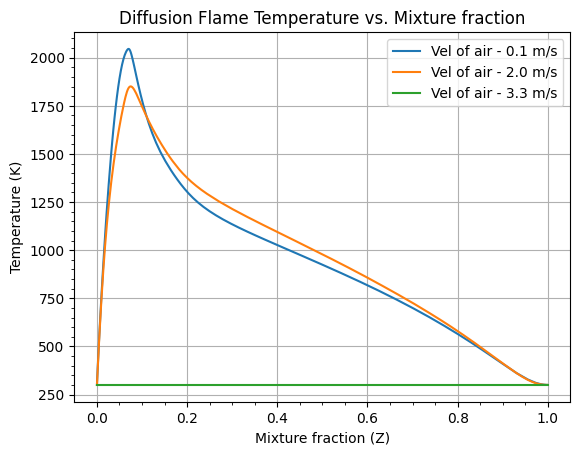

In [101]:
# Create a plot

plt.plot(mixture_fraction_points[0], flame_temp[0],label = 'Vel of air - 0.1 m/s')
plt.plot(mixture_fraction_points[1], flame_temp[1],label = 'Vel of air - 2.0 m/s')
plt.plot(mixture_fraction_points[2], flame_temp[2],label = 'Vel of air - 3.3 m/s')

# Add labels to the axes and a title
plt.xlabel('Mixture fraction (Z)')
plt.ylabel('Temperature (K)')
plt.title('Diffusion Flame Temperature vs. Mixture fraction')
plt.legend(loc='upper right')
# Enable the minor grid
plt.minorticks_on()
plt.grid(True)

# Display the plot (you may not need this in some Python environments)
plt.show()


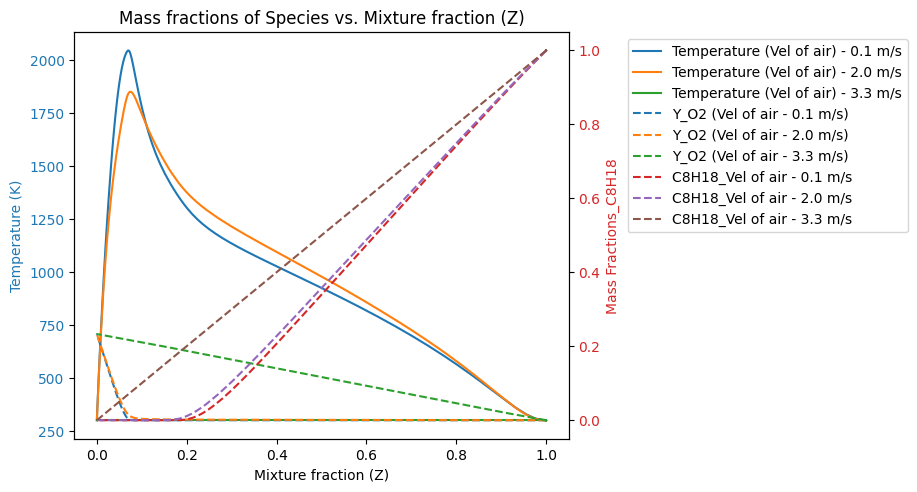

In [123]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Mixture fraction (Z)')
ax1.set_ylabel('Temperature (K)', color='tab:blue')
plt.plot(mixture_fraction_points[0], flame_temp[0],label = 'Temperature (Vel of air) - 0.1 m/s')
plt.plot(mixture_fraction_points[1], flame_temp[1],label = 'Temperature (Vel of air) - 2.0 m/s')
plt.plot(mixture_fraction_points[2], flame_temp[2],label = 'Temperature (Vel of air) - 3.3 m/s')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Mass Fractions_C8H18', color='tab:red')
ax2.plot(mixture_fraction_points[0], YO2_values[0], label='Y_O2 (Vel of air - 0.1 m/s)',linestyle = '--')
ax2.plot(mixture_fraction_points[1], YO2_values[1], label='Y_O2 (Vel of air - 2.0 m/s)',linestyle = '--')
ax2.plot(mixture_fraction_points[2], YO2_values[2], label='Y_O2 (Vel of air - 3.3 m/s)',linestyle = '--')
ax2.plot(mixture_fraction_points[0], YC8H18_values[0], label='C8H18_Vel of air - 0.1 m/s',linestyle = '--')
ax2.plot(mixture_fraction_points[1], YC8H18_values[1], label='C8H18_Vel of air - 2.0 m/s',linestyle = '--')
ax2.plot(mixture_fraction_points[2], YC8H18_values[2], label='C8H18_Vel of air - 3.3 m/s',linestyle = '--')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right', bbox_to_anchor=(1.7, 1))

plt.title('Mass fractions of Species vs. Mixture fraction (Z)')
plt.show()

Bonus question- fuel 1

In [65]:
# Input parameters
p = ct.one_atm  # pressure
tin_f = 300.0  # fuel inlet temperature
tin_o = 300.0  # oxidizer inlet temperature
rho_fuel = 4.6403 #iso octane density
#rho_fuel = 0.657 #methane density
rho_air = 1.19 # density of air at STP

vel_air = 1.5 # velocity of air
vel_fuel = math.sqrt((vel_air*vel_air*rho_air)/rho_fuel)
mdot_o =  rho_air*vel_air
mdot_f =  rho_fuel*vel_fuel

YO2_f1_values = []
YC8H18__f1_values = []
mixture_f1_fraction = []
temp_values_f1 = []

comp_o = 'O2:0.21, N2:0.79'  # air composition
comp_f = 'IXC8H18:1'  # fuel composition
#comp_f = 'CH4:1'  # fuel composition

width = 0.02  # Distance between inlets is 2 cm

loglevel = 1  # amount of diagnostic output (0 to 5)

# Create the gas object used to evaluate all thermodynamic, kinetic, and
# transport properties.
gas = ct.Solution('Jerzembeck.yaml')
#gas = ct.Solution('gri30.yaml')
gas.TP = gas.T, p

# Create an object representing the counterflow flame configuration,
# which consists of a fuel inlet on the left, the flow in the middle,
# and the oxidizer inlet on the right.
f = ct.CounterflowDiffusionFlame(gas, width=width)

# Set the state of the two inlets
f.fuel_inlet.mdot = mdot_f
f.fuel_inlet.X = comp_f
f.fuel_inlet.T = tin_f

f.oxidizer_inlet.mdot = mdot_o
f.oxidizer_inlet.X = comp_o
f.oxidizer_inlet.T = tin_o

# Set the boundary emissivities
f.boundary_emissivities = 0.0, 0.0
# Turn radiation off
f.radiation_enabled = False

f.set_refine_criteria(ratio=4, slope=0.2, curve=0.3, prune=0.04)

# Solve the problem
f.solve(loglevel, auto=True)
f.show()
'''
if "native" in ct.hdf_support():
    output = Path() / "diffusion_flame.h5"
else:
    output = Path() / "diffusion_flame.yaml"
output.unlink(missing_ok=True)
f.save(output)
'''
temp_values_f1.append(f.T)
mixture_f1_fraction.append(f.mixture_fraction('Bilger'))
YO2_f1_values.append(f.Y[gas.species_index('O2')])
YC8H18__f1_values.append(f.Y[gas.species_index('IXC8H18')])
#YC8H18__f1_values.append(f.Y[gas.species_index('CH4')])
f.show_stats(0)


************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     4.449e-07      6.442
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      1.14e-05       6.27
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001948      5.423
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0004932      5.071
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.000395      4.752
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0008436      4.503
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.009609      3.326
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.136e-05       5.53
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003649      4.856
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.924e-05      4.486
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     9.742e-05      4.352
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002774      3.945
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.00474      3.129
Attempt Newton solution of steady-state problem...    success.

Problem solved on [36] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 9 10 11 12 13 14 15 16 17 18 19

Bonus Question - Fuel 2, X_N2 = 0.1

In [66]:
# Input parameters
p = ct.one_atm  # pressure
tin_f = 300.0  # fuel inlet temperature
tin_o = 300.0  # oxidizer inlet temperature
rho_fuel = 4.6403 #iso octane density
#rho_fuel = 0.657 #methane density
rho_air = 1.19 # density of air at STP

vel_air = 1.5 # velocity of air
vel_fuel = math.sqrt((vel_air*vel_air*rho_air)/rho_fuel)
mdot_o =  rho_air*vel_air
mdot_f =  rho_fuel*vel_fuel

YO2_f2_values = []
YC8H18__f2_values = []
mixture_f2_fraction = []
temp_values_f2 = []

comp_o = 'O2:0.21, N2:0.79'  # air composition
comp_f = 'IXC8H18:0.9, N2:0.1'  # fuel composition
#comp_f = 'CH4:0.9, N2:0.1'  # fuel composition

width = 0.02  # Distance between inlets is 2 cm

loglevel = 1  # amount of diagnostic output (0 to 5)

# Create the gas object used to evaluate all thermodynamic, kinetic, and
# transport properties.
gas = ct.Solution('Jerzembeck.yaml')
#gas = ct.Solution('gri30.yaml')
gas.TP = gas.T, p

# Create an object representing the counterflow flame configuration,
# which consists of a fuel inlet on the left, the flow in the middle,
# and the oxidizer inlet on the right.
f = ct.CounterflowDiffusionFlame(gas, width=width)

# Set the state of the two inlets
f.fuel_inlet.mdot = mdot_f
f.fuel_inlet.X = comp_f
f.fuel_inlet.T = tin_f

f.oxidizer_inlet.mdot = mdot_o
f.oxidizer_inlet.X = comp_o
f.oxidizer_inlet.T = tin_o

# Set the boundary emissivities
f.boundary_emissivities = 0.0, 0.0
# Turn radiation off
f.radiation_enabled = False

f.set_refine_criteria(ratio=4, slope=0.2, curve=0.3, prune=0.04)

# Solve the problem
f.solve(loglevel, auto=True)
f.show()
'''
if "native" in ct.hdf_support():
    output = Path() / "diffusion_flame.h5"
else:
    output = Path() / "diffusion_flame.yaml"
output.unlink(missing_ok=True)
f.save(output)
'''
temp_values_f2.append(f.T)
mixture_f2_fraction.append(f.mixture_fraction('Bilger'))
YO2_f2_values.append(f.Y[gas.species_index('O2')])
YC8H18__f2_values.append(f.Y[gas.species_index('IXC8H18')])
#YC8H18__f2_values.append(f.Y[gas.species_index('CH4')])
f.show_stats(0)


************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     4.449e-07      6.533
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      1.14e-05      6.285
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001948      5.452
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0009864      4.889
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0005267      4.565
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

******** Initial solve failed; Retrying with energy equation disabled ********

.................

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001218      4.383
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0005779      4.215
Attempt Newton solution of steady-state problem...    success.

Problem solved on [24] point grid(s).

..............................................................................
grid refinement disabled.

******** Initial solve failed; Retrying with energy equation disabled ********

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     4.449e-07      6.381
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     7.602e-06      5.811
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     5.773e-05      5.498
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     4.871e-05  

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     7.119e-06      5.809
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     3.041e-05      4.977
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.887e-05      4.911
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     4.624e-05      4.883
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002341      4.617
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001666      4.301
Attempt Newton solution of steady-state problem...    success.

Problem solved on [59] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 22 23 24 25 26 27 28 29 30 31 3

Bonus question, fuel 3- XN2_0.2

In [67]:
# Input parameters
p = ct.one_atm  # pressure
tin_f = 300.0  # fuel inlet temperature
tin_o = 300.0  # oxidizer inlet temperature
rho_fuel = 4.6403 #iso octane density
#rho_fuel = 0.657 #methane density
rho_air = 1.19 # density of air at STP

vel_air = 1.5 # velocity of air
vel_fuel = math.sqrt((vel_air*vel_air*rho_air)/rho_fuel)
mdot_o =  rho_air*vel_air
mdot_f =  rho_fuel*vel_fuel

YO2_f3_values = []
YC8H18__f3_values = []
mixture_f3_fraction = []
temp_values_f3 = []

comp_o = 'O2:0.21, N2:0.79'  # air composition
comp_f = 'IXC8H18:0.8, N2:0.2'  # fuel composition
#comp_f = 'CH4:0.8, N2:0.2'  # fuel composition

width = 0.02  # Distance between inlets is 2 cm

loglevel = 1  # amount of diagnostic output (0 to 5)

# Create the gas object used to evaluate all thermodynamic, kinetic, and
# transport properties.
gas = ct.Solution('Jerzembeck.yaml')
#gas = ct.Solution('gri30.yaml')
gas.TP = gas.T, p

# Create an object representing the counterflow flame configuration,
# which consists of a fuel inlet on the left, the flow in the middle,
# and the oxidizer inlet on the right.
f = ct.CounterflowDiffusionFlame(gas, width=width)

# Set the state of the two inlets
f.fuel_inlet.mdot = mdot_f
f.fuel_inlet.X = comp_f
f.fuel_inlet.T = tin_f

f.oxidizer_inlet.mdot = mdot_o
f.oxidizer_inlet.X = comp_o
f.oxidizer_inlet.T = tin_o

# Set the boundary emissivities
f.boundary_emissivities = 0.0, 0.0
# Turn radiation off
f.radiation_enabled = False

f.set_refine_criteria(ratio=4, slope=0.2, curve=0.3, prune=0.04)

# Solve the problem
f.solve(loglevel, auto=True)
f.show()
'''
if "native" in ct.hdf_support():
    output = Path() / "diffusion_flame.h5"
else:
    output = Path() / "diffusion_flame.yaml"
output.unlink(missing_ok=True)
f.save(output)
'''
temp_values_f3.append(f.T)
mixture_f3_fraction.append(f.mixture_fraction('Bilger'))
YO2_f3_values.append(f.Y[gas.species_index('O2')])
YC8H18__f3_values.append(f.Y[gas.species_index('IXC8H18')])
#YC8H18__f3_values.append(f.Y[gas.species_index('CH4')])
f.show_stats(0)


************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     6.674e-07      6.254
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.711e-05      6.135
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001948      5.465
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0009864      4.808
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001665       3.74
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

******** Initial solve failed; Retrying with energy equation disabled ********

.................

Take 10 timesteps      1.14e-05      5.896
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      4.33e-05      5.499
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      8.22e-05      5.038
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001387      4.769
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003511      4.499
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.002666      2.787
Attempt Newton solution of steady-state problem...    success.

Problem solved on [24] point grid(s).

..............................................................................
grid refinement disabled.

********** Solving on 24 point grid with energy equation re-enabled **********

..............................................................................
Attempt Newton solution of steady-state problem...    

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         1e-05      4.905
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         1e-05       4.71
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         1e-05      4.664
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         1e-05      4.675
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         1e-05      4.717
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         1e-05      4.732
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         1e-05      4.733
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         1e-05      4.724
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         1e-05      4.709
Attempt Newton solution of steady-sta

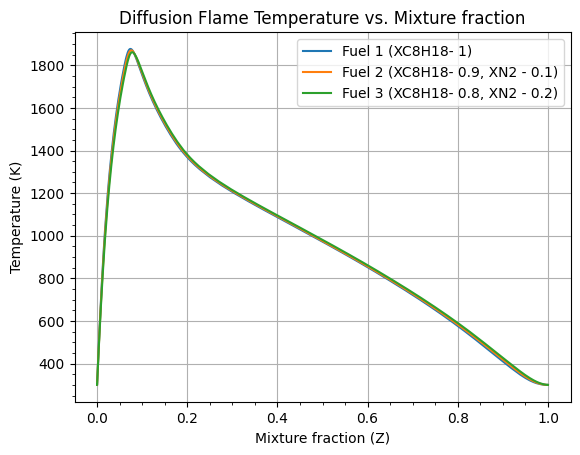

In [68]:
# Create a plot

plt.plot(mixture_f1_fraction[0], temp_values_f1[0],label = 'Fuel 1 (XC8H18- 1)')
plt.plot(mixture_f2_fraction[0], temp_values_f2[0],label = 'Fuel 2 (XC8H18- 0.9, XN2 - 0.1)')
plt.plot(mixture_f3_fraction[0], temp_values_f3[0],label = 'Fuel 3 (XC8H18- 0.8, XN2 - 0.2)')

# Add labels to the axes and a title
plt.xlabel('Mixture fraction (Z)')
plt.ylabel('Temperature (K)')
plt.title('Diffusion Flame Temperature vs. Mixture fraction')
plt.legend(loc='upper right')
# Enable the minor grid
plt.minorticks_on()
plt.grid(True)

# Display the plot (you may not need this in some Python environments)
plt.show()

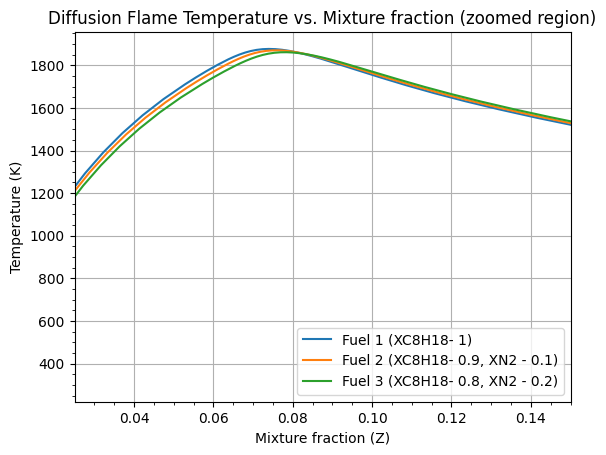

In [81]:
# Create a plot

plt.plot(mixture_f1_fraction[0], temp_values_f1[0],label = 'Fuel 1 (XC8H18- 1)')
plt.plot(mixture_f2_fraction[0], temp_values_f2[0],label = 'Fuel 2 (XC8H18- 0.9, XN2 - 0.1)')
plt.plot(mixture_f3_fraction[0], temp_values_f3[0],label = 'Fuel 3 (XC8H18- 0.8, XN2 - 0.2)')

# Add labels to the axes and a title
plt.xlabel('Mixture fraction (Z)')
plt.ylabel('Temperature (K)')
plt.title('Diffusion Flame Temperature vs. Mixture fraction (zoomed region)')
plt.legend(loc='lower right')
# Enable the minor grid
plt.minorticks_on()
plt.grid(True)
plt.xlim([0.025, 0.15])
# Display the plot (you may not need this in some Python environments)
plt.show()

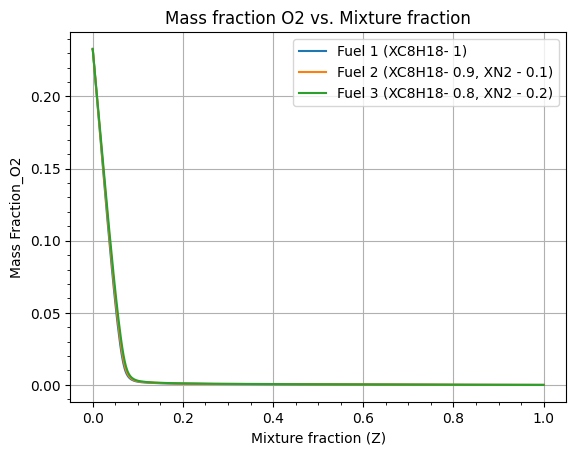

In [79]:
# Create a plot

plt.plot(mixture_f1_fraction[0], YO2_f1_values[0],label = 'Fuel 1 (XC8H18- 1)')
plt.plot(mixture_f2_fraction[0], YO2_f2_values[0],label = 'Fuel 2 (XC8H18- 0.9, XN2 - 0.1)')
plt.plot(mixture_f3_fraction[0], YO2_f3_values[0],label = 'Fuel 3 (XC8H18- 0.8, XN2 - 0.2)')

# Add labels to the axes and a title
plt.xlabel('Mixture fraction (Z)')
plt.ylabel('Mass Fraction_O2')
plt.title('Mass fraction O2 vs. Mixture fraction')
plt.legend(loc='upper right')
# Enable the minor grid
plt.minorticks_on()
plt.grid(True)
#plt.xlim([0.025, 0.15])
# Display the plot (you may not need this in some Python environments)
plt.show()

In [ ]:
# Create a plot

plt.plot(mixture_f1_fraction[0], YO2_f1_values[0],label = 'Fuel 1 (XC8H18- 1)')
plt.plot(mixture_f2_fraction[0], YO2_f2_values[0],label = 'Fuel 2 (XC8H18- 0.9, XN2 - 0.1)')
plt.plot(mixture_f3_fraction[0], YO2_f3_values[0],label = 'Fuel 3 (XC8H18- 0.8, XN2 - 0.2)')

# Add labels to the axes and a title
plt.xlabel('Mixture fraction (Z)')
plt.ylabel('Mass Fraction_O2')
plt.title('Mass fraction O2 vs. Mixture fraction (zoomed region)')
plt.legend(loc='upper right')
# Enable the minor grid
plt.minorticks_on()
plt.grid(True)
plt.xlim([0.025, 0.1])
# Display the plot (you may not need this in some Python environments)
plt.show()

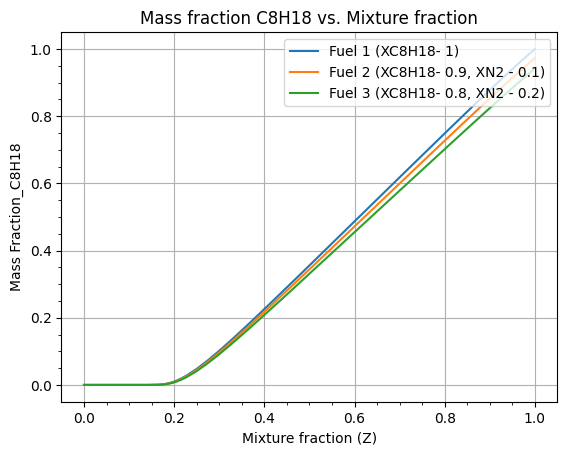

In [70]:
# Create a plot

plt.plot(mixture_f1_fraction[0], YC8H18__f1_values[0],label = 'Fuel 1 (XC8H18- 1)')
plt.plot(mixture_f2_fraction[0],YC8H18__f2_values[0],label = 'Fuel 2 (XC8H18- 0.9, XN2 - 0.1)')
plt.plot(mixture_f3_fraction[0], YC8H18__f3_values[0],label = 'Fuel 3 (XC8H18- 0.8, XN2 - 0.2)')

# Add labels to the axes and a title
plt.xlabel('Mixture fraction (Z)')
plt.ylabel('Mass Fraction_C8H18')
plt.title('Mass fraction C8H18 vs. Mixture fraction')
plt.legend(loc='upper right')
# Enable the minor grid
plt.minorticks_on()
plt.grid(True)

# Display the plot (you may not need this in some Python environments)
plt.show()